# LAB 5: IMPLEMENTATION OF MIDPOINT ELLIPSE DRAWING ALGORITHM

## 1. Implement the midpoint ellipse algorithm.

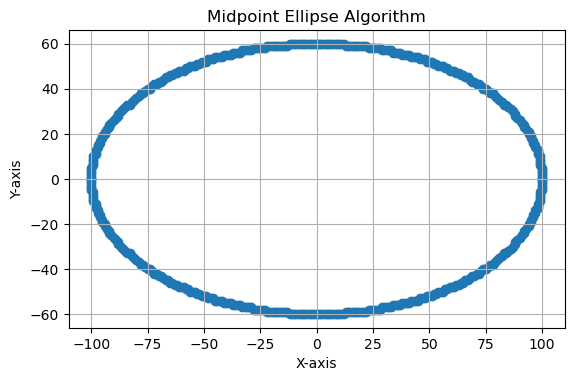

In [7]:
import matplotlib.pyplot as plt

def midpoint_ellipse(rx, ry, xc, yc):
    x = 0
    y = ry

    rx2 = rx * rx
    ry2 = ry * ry

    p1 = ry2 - (rx2 * ry) + (0.25 * rx2)

    points_x = []
    points_y = []

    while (2 * ry2 * x) <= (2 * rx2 * y):
        points_x.extend([ xc + x, xc - x, xc + x, xc - x ])
        points_y.extend([ yc + y, yc + y, yc - y, yc - y ])

        if p1 < 0:
            x += 1
            p1 += 2 * ry2 * x + ry2
        else:
            x += 1
            y -= 1
            p1 += 2 * ry2 * x - 2 * rx2 * y + ry2

    p2 = (ry2 * (x + 0.5)**2) + (rx2 * (y - 1)**2) - (rx2 * ry2)


    while y >= 0:
        points_x.extend([ xc + x, xc - x, xc + x, xc - x ])
        points_y.extend([ yc + y, yc + y, yc - y, yc - y ])

        if p2 > 0:
            y -= 1
            p2 += rx2 - 2 * rx2 * y
        else:
            y -= 1
            x += 1
            p2 += 2 * ry2 * x - 2 * rx2 * y + rx2

    return points_x, points_y
rx = 100
ry = 60
xc = 0
yc = 0

x, y = midpoint_ellipse(rx, ry, xc, yc)

plt.scatter(x, y)
plt.title("Midpoint Ellipse Algorithm")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()


## 2. Draw ellipses with different radii and centres.

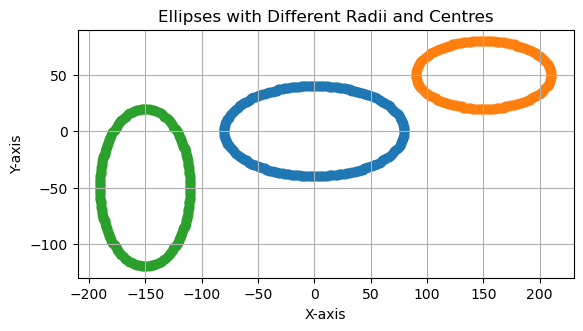

In [8]:
import matplotlib.pyplot as plt

def midpoint_ellipse(rx, ry, xc, yc):
    x = 0
    y = ry

    rx2 = rx * rx
    ry2 = ry * ry

    p1 = ry2 - (rx2 * ry) + (0.25 * rx2)

    X = []
    Y = []

    while (2 * ry2 * x) <= (2 * rx2 * y):
        X.extend([xc + x, xc - x, xc + x, xc - x])
        Y.extend([yc + y, yc + y, yc - y, yc - y])

        if p1 < 0:
            x += 1
            p1 += 2 * ry2 * x + ry2
        else:
            x += 1
            y -= 1
            p1 += 2 * ry2 * x - 2 * rx2 * y + ry2

    p2 = (ry2 * (x + 0.5)**2) + (rx2 * (y - 1)**2) - (rx2 * ry2)

    while y >= 0:
        X.extend([xc + x, xc - x, xc + x, xc - x])
        Y.extend([yc + y, yc + y, yc - y, yc - y])

        if p2 > 0:
            y -= 1
            p2 += rx2 - 2 * rx2 * y
        else:
            y -= 1
            x += 1
            p2 += 2 * ry2 * x - 2 * rx2 * y + rx2

    return X, Y


ellipses = [
    (80, 40, 0, 0),      
    (60, 30, 150, 50),
    (40, 70, -150, -50)
]

plt.figure()

for rx, ry, xc, yc in ellipses:
    x, y = midpoint_ellipse(rx, ry, xc, yc)
    plt.scatter(x, y)

plt.title("Ellipses with Different Radii and Centres")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()


## 3. Compare the point spacing in Region 1 and Region 2.

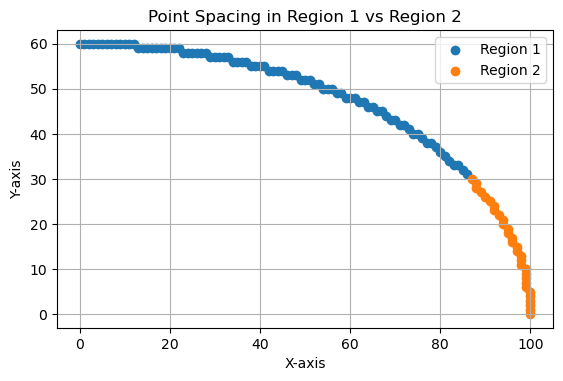

In [9]:
import matplotlib.pyplot as plt

def midpoint_ellipse_regions(rx, ry, xc, yc):
    x = 0
    y = ry

    rx2 = rx * rx
    ry2 = ry * ry

    p1 = ry2 - (rx2 * ry) + (0.25 * rx2)

    R1x, R1y = [], []
    R2x, R2y = [], []

    # -------- Region 1 --------
    while (2 * ry2 * x) <= (2 * rx2 * y):
        R1x.append(xc + x)
        R1y.append(yc + y)

        if p1 < 0:
            x += 1
            p1 += 2 * ry2 * x + ry2
        else:
            x += 1
            y -= 1
            p1 += 2 * ry2 * x - 2 * rx2 * y + ry2

    p2 = (ry2 * (x + 0.5)**2) + (rx2 * (y - 1)**2) - (rx2 * ry2)

    #  Region 2 
    while y >= 0:
        R2x.append(xc + x)
        R2y.append(yc + y)

        if p2 > 0:
            y -= 1
            p2 += rx2 - 2 * rx2 * y
        else:
            y -= 1
            x += 1
            p2 += 2 * ry2 * x - 2 * rx2 * y + rx2

    return R1x, R1y, R2x, R2y


rx, ry = 100, 60
xc, yc = 0, 0

r1x, r1y, r2x, r2y = midpoint_ellipse_regions(rx, ry, xc, yc)

plt.scatter(r1x, r1y, label="Region 1")
plt.scatter(r2x, r2y, label="Region 2")

plt.title("Point Spacing in Region 1 vs Region 2")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()


## Draw an ellipse animation that delays.

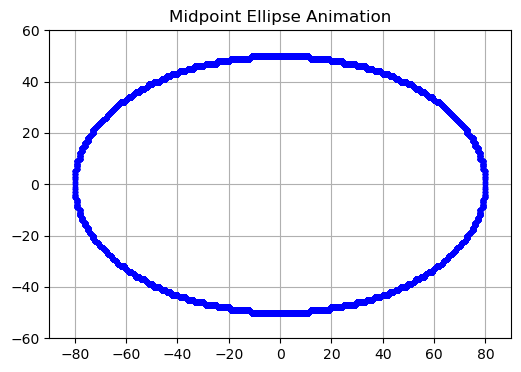

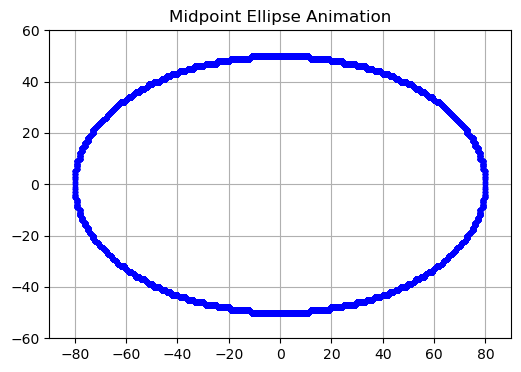

In [16]:
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output

def midpoint_ellipse_animation(rx, ry, xc, yc, delay=0.01):
    x = 0
    y = ry

    rx2 = rx * rx
    ry2 = ry * ry

    p1 = ry2 - (rx2 * ry) + (0.25 * rx2)

    fig, ax = plt.subplots(figsize=(6,4))
    ax.set_aspect('equal')
    ax.set_xlim(xc - rx - 10, xc + rx + 10)
    ax.set_ylim(yc - ry - 10, yc + ry + 10)
    ax.set_title("Midpoint Ellipse Animation")
    ax.grid(True)

    X, Y = [], []

    # Region 1 
    while (2 * ry2 * x) <= (2 * rx2 * y):
        for px, py in [
            (xc + x, yc + y), (xc - x, yc + y),
            (xc + x, yc - y), (xc - x, yc - y)
        ]:
            X.append(px)
            Y.append(py)

        ax.plot(X, Y, 'b.')
        clear_output(wait=True)
        display(fig)
        time.sleep(delay)

        if p1 < 0:
            x += 1
            p1 += 2 * ry2 * x + ry2
        else:
            x += 1
            y -= 1
            p1 += 2 * ry2 * x - 2 * rx2 * y + ry2

    p2 = (ry2 * (x + 0.5)**2) + (rx2 * (y - 1)**2) - (rx2 * ry2)

    # Region 2 
    while y >= 0:
        for px, py in [
            (xc + x, yc + y), (xc - x, yc + y),
            (xc + x, yc - y), (xc - x, yc - y)
        ]:
            X.append(px)
            Y.append(py)

        ax.plot(X, Y, 'b.')
        clear_output(wait=True)
        display(fig)
        time.sleep(delay)

        if p2 > 0:
            y -= 1
            p2 += rx2 - 2 * rx2 * y
        else:
            y -= 1
            x += 1
            p2 += 2 * ry2 * x - 2 * rx2 * y + rx2

    plt.show()


midpoint_ellipse_animation(80, 50, 0, 0, delay=0.02)
